# DiploDatos 2020 - Coronavirus en Argentina

El dataset se encuetra en:

https://github.com/lucia15/Datos-Covid19-Argentina

In [ ]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Práctico Introducción al Machine Learning

**Consigna:**

Proponer un modelo de Aprendizaje Automático para estos datos. 

Para ello deberan explorar y probar varios modelos, buscando las configuraciones que mejores resultados den. Tener en cuenta:

* Elección de la variable objetivo y features
* Selección de un modelo
* Ajuste de hiperparámetros 
* Evaluación

Veamos unos sencillos (e incompletos) **ejemplos**.

### Carga de datos

In [ ]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/lucia15/Datos-Covid19-Argentina/master/Argentina-covid19.csv'

data = pd.read_csv(url, error_bad_lines=False)

**Variable objetivo: 'casos_nuevos'**

Puesto que muchas de las variables presentes en el dataset son **series temporales**, es importante tener en cuenta que para aplicar modelos de aprendizaje supervisado, es necesario realizar algunas adaptaciones previamente.

El siguiente método se conoce como **sliding window**.

In [ ]:
df = pd.DataFrame()

df['t'] = data['casos_nuevos']
df['t+1'] =  df['t'].shift(-1)

df

,t,t+1
0,1,1.0
1,1,7.0
2,7,3.0
3,3,5.0
4,5,2.0
...,...,...
141,5493,4814.0
142,4814,4192.0
143,4192,4890.0
144,4890,5939.0


Tiramos la última fila que contiene un NaN

In [ ]:
df.drop(df.tail(1).index,inplace=True)

In [ ]:
df['t'].shape, df['t+1'].shape

((145,), (145,))

Fuente: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

### División en etrenamiento y evaluación

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df['t'].to_numpy().reshape(-1,1), df['t+1'].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((116, 1), (29, 1))

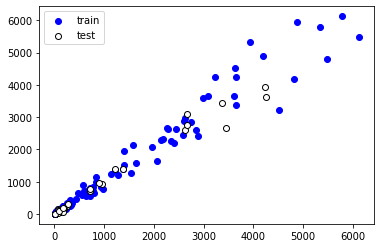

In [ ]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="white", edgecolor="k", label="test")
plt.legend()
plt.show()

### Regresión Lineal

Probaremos ajustar los puntos usando una recta.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_test_pred = regr.predict(X_test)

# and training set
y_train_pred = regr.predict(X_train)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Mean squared error')

print('Train error: %.2f' % train_error)
print('Test error: %.2f' % test_error)

# The coefficient of determination: 1 is perfect prediction

train_coeff = r2_score(y_train, y_train_pred)
test_coeff = r2_score(y_test, y_test_pred)

print('Coefficient of determination')

print('Train: %.2f' % train_coeff)
print('Test: %.2f' % test_coeff)

Coefficients: 
 [[1.02818645]]
Mean squared error
Train error: 99645.89
Test error: 63069.52
Coefficient of determination
Train: 0.96
Test: 0.96


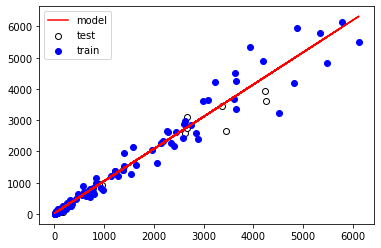

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test,  color='white', edgecolor='k', label='test')
plt.scatter(X_train, y_train,  color='blue', label='train')
plt.plot(X_train, y_train_pred, color='red', label='model')
plt.legend()
plt.show()

### Clasificación

In [ ]:
url = 'https://raw.githubusercontent.com/lucia15/Datos-Covid19-Argentina/master/Argentina-covid19-fallecidos.csv'

data = pd.read_csv(url, error_bad_lines=False)

In [ ]:
data = data.drop(columns=['fecha', 'num_caso', 'tipo_caso', 'comorbilidades', 'viajes', 'observaciones'])

data = data.dropna()

data

,provincia,genero,edad
0,CABA,hombre,64.0
1,Chaco,hombre,61.0
2,CABA,hombre,64.0
3,Buenos Aires,mujer,67.0
5,Chaco,hombre,53.0
...,...,...,...
2277,Río Negro,hombre,87.0
2278,Buenos Aires,mujer,74.0
2279,Buenos Aires,mujer,61.0
2280,Buenos Aires,mujer,64.0


Tenemos 17 provincias:

In [ ]:
print(data['provincia'].unique())

['CABA' 'Chaco' 'Buenos Aires' 'Tucumán' 'Neuquén' 'La Rioja' 'Córdoba'
 'Santa Fe' 'Mendoza' 'Río Negro' 'Misiones' 'Chubut' 'Jujuy'
 'Tierra del Fuego' 'Salta' 'Entre Ríos' 'Corrientes']


Como se trata de una **variable categórica**, en la cuál no hay una relación de orden entre las categorías, necesitamos aplicar un **One Hot Encoding**

In [ ]:
data = pd.concat([data, pd.get_dummies(data['provincia'], prefix='provincia')],axis=1).drop(['provincia'], axis=1)

data

,genero,edad,provincia_Buenos Aires,provincia_CABA,provincia_Chaco,provincia_Chubut,provincia_Corrientes,provincia_Córdoba,provincia_Entre Ríos,provincia_Jujuy,provincia_La Rioja,provincia_Mendoza,provincia_Misiones,provincia_Neuquén,provincia_Río Negro,provincia_Salta,provincia_Santa Fe,provincia_Tierra del Fuego,provincia_Tucumán
0,hombre,64.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,hombre,61.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,hombre,64.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mujer,67.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,hombre,53.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,hombre,87.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2278,mujer,74.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2279,mujer,61.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2280,mujer,64.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Selección de features y variable objetivo

**variable objetivo: 'genero'**

In [ ]:
feature_names = ['provincia_Buenos Aires', 'provincia_CABA', 'provincia_Chaco', 'provincia_Chubut', 'provincia_Corrientes', 'provincia_Córdoba', 'provincia_Entre Ríos', 'provincia_Jujuy', 'provincia_La Rioja', 
                 'provincia_Mendoza', 'provincia_Misiones', 'provincia_Neuquén', 'provincia_Río Negro', 'provincia_Salta', 'provincia_Santa Fe', 'provincia_Tierra del Fuego', 'provincia_Tucumán', 'edad']

X = data[feature_names]
y = data['genero']

In [ ]:
X.shape, y.shape

((2254, 18), (2254,))

### División en etrenamiento y evaluación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 18), (564, 18), (1690,), (564,))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import classification_report

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      hombre       0.64      0.84      0.73       328
       mujer       0.61      0.35      0.44       236

    accuracy                           0.63       564
   macro avg       0.63      0.59      0.59       564
weighted avg       0.63      0.63      0.61       564

